In [1]:
"""Weather data module

See definitions.ipynb for more discussion of individual points.
"""

'Weather data module\n\nSee definitions.ipynb for more discussion of individual points.\n'

In [1]:
# import libraries

import os
import glob

import pandas as pd
import numpy as np


Here is a function which reads and concatenates an input directory of csv files into a single Pandas DataFrame. The function takes the directory path as input and returns the concatenated dataframe. The function uses the `os` and `pandas` libraries.

In [16]:
def read_files(dirname):
    """Read and concatenate all files in a directory into a single pandas DataFrame.
    
    Parameters
    ----------
    
    dirname: str
        Name of the directory to read
        
    Returns
    -------
    
    pandas.DataFrame
        The concatenated data.

    """
    
    if not os.path.exists(dirname):
        raise ValueError(f"Directory {dirname} does not exist.")
    
    search_path = os.path.join(dirname, "*.csv")
    
    files = glob.glob(search_path)

    all_df = { f : pd.read_csv(f) for f in files }

    for key, df in all_df.items():
        df['site'] = key.split('/')[-1].split('.')[0]
  
    # concatenate all csv files into one dataframe
    large_df = pd.concat(all_df, ignore_index=True)

    idx = pd.MultiIndex.from_arrays((large_df['dateTime'],
                                     large_df['site']))
        
    large_df = large_df.set_index(idx).sort_index()

    return large_df.drop(columns=['dateTime', 'site']) # drop the columns that are not needed

merged_df = read_files('raw')
merged_df.head()

id  longitude  \
dateTime         site                                                       
01/04/2021       dover     ?20210401azzadtc1tre6znxqyyb96scx3r      1.348   
                 northolt  ?20210401azzadpc1tre6znxqyyb96scx3r     -0.415   
                 st-athan  ?20210401azzadqh1tre6znxqyyb96scx3r     -3.440   
01/04/2021 01:00 dover      20210401r67gxwc11ee6znxqyyb96scx3r      1.348   
                 northolt   20210401r67gxoc11ee6znxqyyb96scx3r     -0.415   

                           latitude  airTemperature  dewPoint  \
dateTime         site                                           
01/04/2021       dover       51.133            16.1       5.0   
                 northolt    51.548            11.2       8.2   
                 st-athan    51.405            11.6       8.2   
01/04/2021 01:00 dover       51.133            15.0       6.8   
                 northolt    51.548            11.4       8.5   

                           meanSeaLevelPressure  relativeHumidity  windSpeed  \
dateTime         site                                                          
01/04/2021       dover                     1020              47.2        2.6   
                 northolt                  1020              81.6        1.7   
                 st-athan                  1019              79.4        4.3   
01/04/2021 01:00 dover                     1019              57.6        2.6   
                 northolt                  1020              82.2        1.7   

                           windDirection  windGust visibility  
dateTime         site                                          
01/04/2021       dover              90.0       NaN        NaN  
                 northolt          315.0       NaN          7  
                 st-athan           67.5       NaN          7  
01/04/2021 01:00 dover              90.0       NaN        NaN  
                 northolt          315.0       NaN          7

In [17]:
merged_df.to_csv('/home/zt24/numerical-programming-in-python/npp-pandas-assessment-esemsc-zt24/test_read_files/try_merged_df.csv')

In [4]:
#Trying another ways to read and concatenate the csv file
from openpyxl import Workbook

file_path = r'/home/zt24/numerical-programming-in-python/npp-pandas-assessment-esemsc-zt24/raw'
all_files = glob.glob(os.path.join(file_path, "*.csv"))

all_data = []
for filename in all_files:
    try:
        data = pd.read_csv(filename)
        all_data.append(data)
    except Exception as e:
        print(f"Error reading file {filename}: {e}")

#try to check if the data was added
if not all_data:
    print(f"No data was loaded")

#try to concatenate the data
if all_data:
    frame = pd.concat(all_data, axis=0, ignore_index=True, sort=True)
    frame1 = frame.drop(columns=['dateTime', 'site'])
    frame1.to_csv('/home/zt24/numerical-programming-in-python/npp-pandas-assessment-esemsc-zt24/test_read_files/try_merged_df.csv')
    frame1.to_excel('/home/zt24/numerical-programming-in-python/npp-pandas-assessment-esemsc-zt24/test_read_files/try_merged_df.xlsx', sheet_name ='Sheet1')
else:
    print("No dataframe to concatenate.")

Using this data as a starting point, you are going to implement functions to analyse this weather data.

## Part I: Short functions

This section contains docstrings defining a single purpose functions that need to be implemented. Each function is worth a maximum of 7 points.

In [5]:
def calculate_rankine_temperature(dataframe):
    """Calculate Rankine temperature from input Celcius air temperature.

    The Rankine temperature is the equivalent to Kelvin temperature, but using the Fahrenheit
    temperature scale instead of Celsius.

    See definintions.ipynb for more discussion of Rankine temperature.

    The original data will not be modified.
    
    Parameters
    ----------
    
    dataframe: pandas.DataFrame or array-like
        Input data in the format returned by the read_files function, or array of air temperatures.
        
    Returns
    -------
    
    pandas.DataFrame
        A new data with original data plus an additional column named 'rankineAirTemperature'
        containing the air temperature in Rakine units.
    
    Example:

    >>> data = pd.DataFrame({'airTemperature': [0, 100]})
    >>> calculate_rankine_temperature(data)
        airTemperature rankineAirTemperature
    0                0                491.67 
    1              100                671.67 
    """

    #My code start here
    air_temperature = dataframe['airTemperature']
    
    #Calculate rankine air temperature
    fahrenheit = (9 / 5) * air_temperature + 32
    rankine = fahrenheit + 459.67

    #Create new dataframe
    rankine_temperature = pd.DataFrame({
        'airTemperature': air_temperature,
        'rankineAirTemperature': rankine,
    })

    return rankine_temperature # modify this line to return the correct result

#Example usage:
data = pd.DataFrame({'airTemperature': [0, 100]})
rankine_result = calculate_rankine_temperature(data)
print(rankine_result)

   airTemperature  rankineAirTemperature
0               0                 491.67
1             100                 671.67


In [6]:
def calculate_mean_wind_direction(wind_direction):
    """Calculate the mean wind direction via a reduction to components.

    The input wind direction is assumed to be given in degrees, with 0 degrees being a wind coming from the North, and increasing clockwise.

    The output mean wind direction is calculated following the algorithm described in the definitions.ipynb notebook, which involves a reduction to components, averaging and then applying the inverse tangent function.

    Parameters
    ----------

    wind_direction: array-like or pandas.Series
        The wind direction in degrees.

    Returns
    -------

        float
            The mean wind direction in degrees.
    
    Example:

    >>> calculate_mean_wind_direction([0, 90, 180])
    90.0
    >>> calculate_mean_wind_direction([90, 0, 270])
    0.0
    """
    #My work start here
    import math
    
    arr = np.array(wind_direction).astype(float)
    arr = arr[~np.isnan(arr)]

    if len(arr) == 0:
        return float('nan')

    sin = np.zeros(len(arr))
    cos = np.zeros(len(arr))
    for i in range(len(arr)):
        sin[i] = math.sin(math.radians(arr[i]))
        cos[i] = math.cos(math.radians(arr[i]))

    #Calculate the mean wind direction
    wind_dir = math.degrees(math.atan2(np.mean(sin), np.mean(cos)))

    return wind_dir

#Example usage:
print(calculate_mean_wind_direction([0, 90, 180]))
print(calculate_mean_wind_direction([90, 0, 270]))

90.0
0.0


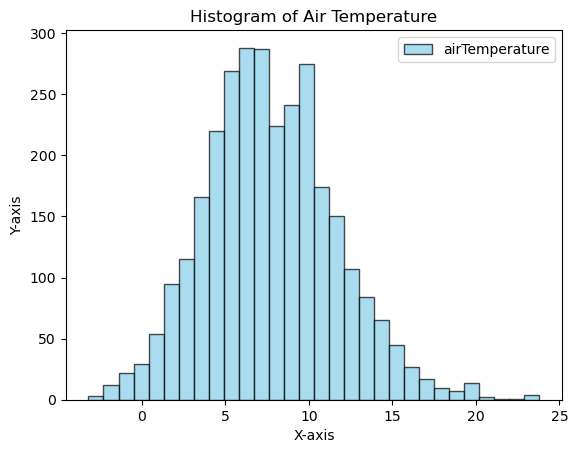

<Axes: title={'center': 'Histogram of Air Temperature'}, xlabel='X-axis', ylabel='Y-axis'>

In [7]:
import matplotlib.pyplot as plt

#Open the file
def read_data(file_path, specified_columns):
    dataframe = pd.read_csv(file_path)
    specified_column = ['airTemperature']
    data = dataframe[specified_column]
    return data

def plot_histograms(dataframe, variables=['airTemperature'], *kwargs):
    """Plot a histogram of the data in the dataspecified variable or variables

    The histogram can be created using Pandas or Matplotlib. It should be appropriately labelled and titled.

    Parameters
    ----------

    dataframe: pandas.DataFrame
        Input data in the format of the read_files function.
    variables: list of str
        The variable or variables to plot.

    Returns
    -------

    matplotlib.Axes
        The axes in which the histogram was drawn.
    """

    #Set default kwargs if not provided
    default_kwargs = {
        'bins': 30,
        'color': 'skyblue',
        'edgecolor': 'black',
        'alpha': 0.7
    }

    #Update default kwargs with any provided kwargs
    default_kwargs.update(kwargs)

    #Plot histogram
    ax = dataframe[variables].plot.hist(**default_kwargs, legend=True)

    #Labeling
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Histogram of Air Temperature')

    #Show the plot
    plt.show()

    return ax

#Example
plot_histograms(merged_df, ['airTemperature'])

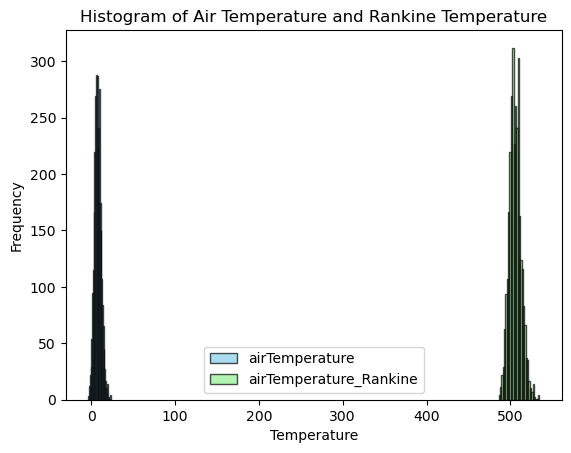

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to read data from the file and select specified columns
def read_data(file_path, specified_columns):
    dataframe = pd.read_csv(file_path)
    data = dataframe[specified_columns]  # Select specified columns
    return data

# Function to convert Celsius to Rankine
def celsius_to_rankine(temp_celsius):
    return (temp_celsius + 273.15) * 9 / 5

# Function to plot histograms for multiple variables
def plot_histograms(dataframe, variables=['airTemperature'], **kwargs):
    """Plot histograms for the specified variables"""

    # Set default kwargs if not provided
    default_kwargs = {
        'bins': 30,
        'edgecolor': 'black',
        'alpha': 0.7
    }

    # Update default kwargs with any provided kwargs
    default_kwargs.update(kwargs)

    # Create the figure and axis
    fig, ax = plt.subplots()

    # Colors for the histograms
    colors = ['skyblue', 'lightgreen']

    # Plot histograms for each variable
    for i, var in enumerate(variables):
        if var in dataframe.columns:  # Ensure the variable exists in the DataFrame
            dataframe[var].plot.hist(
                bins=default_kwargs['bins'],
                color=colors[i % len(colors)],
                edgecolor=default_kwargs['edgecolor'],
                alpha=default_kwargs['alpha'],
                label=var,
                ax=ax
            )

    # Labeling
    ax.set_xlabel('Temperature')
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of Air Temperature and Rankine Temperature')
    ax.legend()

    # Show the plot
    plt.show()

    return ax

# Example usage
file_path = '/home/zt24/numerical-programming-in-python/npp-pandas-assessment-esemsc-zt24/test_read_files/try_merged_df.csv'
specified_columns = ['airTemperature']  # Specify the columns to read
open_data = read_data(file_path, specified_columns)

# Check if 'airTemperature' exists in the data
if 'airTemperature' in open_data.columns:
    # Convert airTemperature from Celsius to Rankine and add it to the DataFrame
    open_data['airTemperature_Rankine'] = celsius_to_rankine(open_data['airTemperature'])

    # Plot histograms for both airTemperature and airTemperature_Rankine
    plot_histograms(open_data, variables=['airTemperature', 'airTemperature_Rankine'])
else:
    print("'airTemperature' column not found in the data!")

In [22]:
def suspect_data(dataframe):
    """Return a multi-indexed Pandas DataFrame of all suspect data in an
    input dataframe. Here data is suspect if the dew point is more than 0.2
    degrees off the formula in definitions.ipynb.

    Parameters
    ----------

    dataframe: pandas.DataFrame
        input data

    Returns
    -------

    pandas.DataFrame
        The relevant data, multi-indexed by site name and dateTime.

    """
    df_dewPoint = dataframe
    
    #Calculate dew point using formula in definition.ipynb
    df_dewPoint['f(T_r)'] = np.log(df_dewPoint['relativeHumidity'] / 100) + ((17.67 * df_dewPoint['airTemperature']) / (243.5 + df_dewPoint['airTemperature']))
    df_dewPoint['expected_dew_point'] = (243.5 * df_dewPoint['f(T_r)']) / (17.67 - df_dewPoint['f(T_r)'])
    df_dewPoint['delta_dew_point'] = abs(df_dewPoint['dewPoint'] - df_dewPoint['expected_dew_point'])

    #Identify suspect data
    df_dewPoint['IsDataSuspicious'] = df_dewPoint['delta_dew_point'].apply(lambda x: 'Yes' if x > 0.2 else 'No')
    df_dewPoint = df_dewPoint.filter(items=['dewPoint', 'expected_dew_point', 'delta_dew_point', 'IsDataSuspicious'])

    return df_dewPoint

#Example:
suspect_data(merged_df)

dewPoint  expected_dew_point  delta_dew_point  \
dateTime         site                                                      
01/04/2021       dover          5.0            4.850214         0.149786   
                 northolt       8.2            8.170641         0.029359   
                 st-athan       8.2            8.158240         0.041760   
01/04/2021 01:00 dover          6.8            6.707470         0.092530   
                 northolt       8.5            8.473968         0.026032   
...                             ...                 ...              ...   
31/03/2021 22:00 northolt       7.1            7.046664         0.053336   
                 st-athan       9.1            9.066831         0.033169   
31/03/2021 23:00 dover          5.6            5.475080         0.124920   
                 northolt       7.8            7.764315         0.035685   
                 st-athan       8.9            8.861987         0.038013   

                          IsDataSuspicious  
dateTime         site                       
01/04/2021       dover                  No  
                 northolt               No  
                 st-athan               No  
01/04/2021 01:00 dover                  No  
                 northolt               No  
...                                    ...  
31/03/2021 22:00 northolt               No  
                 st-athan               No  
31/03/2021 23:00 dover                  No  
                 northolt               No  
                 st-athan               No  

[3008 rows x 4 columns]

## Part II: Multi-step functions

This section contains docstrings defining functions involving multiple steps or calculations that need to be implemented. Each function is worth a maximum of 12 points, and your best 3 functions will be selected for grading.

In [31]:
from scipy.stats import gmean

def calculate_averages(dataframe):
    """ Calculate averages for all numerical columns in the input data.

    The averages are:
    - arithmetic mean
    - median
    - geometric mean
    - arithmetic-geometric mean (AGM)

    The formulas for these averages are given in definitions.ipynb.
    
    You do not need to treat wind direction differently from other variables in this function.

    You should implement the AGM calculation yourself, otherwise you can use libaray functions for averages.

    The output DataFrame will have an Index corresponding to the columns of the input and four columns, one for each average.
    
    The original data will not be modified.
    
    Input
    -----

    dataframe: pandas.DataFrame
        Input data in the format of the read_files function.

    Returns
    -------

    pandas.DataFrame
        A new data with the averages of the input data.
    
    """

   # Define arithmetic-geometric mean (AGM)
    def arithmetic_geometric_mean(a0, b0, tol=1e-12):
        while abs(a0 - b0) > tol:
            a0, b0 = (a0 + b0) / 2, np.sqrt(a0 * b0)
        return a0
    
    # Prepare results dictionary
    calc_results = {
        'Arithmetic Mean': [],
        'Median': [],
        'Geometric Mean': [],
        'AGM': []
    }

    # Select only numerical columns
    numerical_cols = dataframe.select_dtypes(include=[np.number])

    # Loop through each numerical column and calculate averages
    for col in numerical_cols:  # Iterate over each numerical column
        arithmetic_mean = dataframe[col].mean()
        median = dataframe[col].median()
        geometric_mean = gmean(dataframe[col].dropna())  # Drop NaN values for geometric mean
        agm = arithmetic_geometric_mean(arithmetic_mean, median)

        calc_results['Arithmetic Mean'].append(arithmetic_mean)
        calc_results['Median'].append(median)
        calc_results['Geometric Mean'].append(geometric_mean)
        calc_results['AGM'].append(agm)

    # Create new dataframe with the average calculations, indexed by column names
    averages_data = pd.DataFrame(calc_results, index=numerical_cols.columns)

    return averages_data

# Example usage:
averages = calculate_averages(merged_df)
print(averages)

                      Arithmetic Mean       Median  Geometric Mean  \
longitude                   -0.897139    -0.415000             NaN   
latitude                    51.363015    51.405000       51.362733   
airTemperature               7.681582     7.500000             NaN   
dewPoint                     2.206416     2.200000             NaN   
meanSeaLevelPressure      1020.106715  1021.000000     1020.069928   
relativeHumidity            70.140691    72.200000       67.797003   
windSpeed                    8.969424     7.800000        0.000000   
windDirection              152.008790   112.500000        0.000000   
windGust                    22.613115    26.900000        0.000000   
f(T_r)                       0.147546     0.155476             NaN   
expected_dew_point           2.100576     2.161547             NaN   
delta_dew_point              0.106327     0.065062        0.000000   

                              AGM  
longitude               -0.022948  
latitude         

/home/zt24/downloads/bash/envs/npp2024/lib/python3.12/site-packages/scipy/stats/_stats_py.py:208: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)
/tmp/ipykernel_79302/2492046991.py:39: RuntimeWarning: invalid value encountered in sqrt
  a0, b0 = (a0 + b0) / 2, np.sqrt(a0 * b0)


In [92]:
def invalid_data(dataframe):
    """Return a multi-indexed Pandas DataFrame of all potentially invalid data. Here
    data is considered potentially invalid if the values are:
      - not a number (NaN)
      - not between:
        - 0 and 110 for relative humidity
        - 0 and 50 for wind speed
        - 0 and 360 for wind direction
        - 0 and 100 for wind gust
        - -50 and 50 for air temperature/dew point temperature

    The original data will not be modified.

    Parameters
    ----------
    dataframe: pandas.DataFrame
        input data

    Returns
    -------
    pandas.DataFrame
        The relevant data multi-indexed by 'site' and 'dateTime'.
    """
    
    # Initialize the 'notes' column with empty strings
    dataframe['IsDataInvalid'] = ''

    # Create a boolean mask for invalid data
    invalid_mask = (
        (dataframe['relativeHumidity'].isna()) | 
        (dataframe['relativeHumidity'] < 0) | (dataframe['relativeHumidity'] > 110) |
        (dataframe['windSpeed'].isna()) | 
        (dataframe['windSpeed'] < 0) | (dataframe['windSpeed'] > 50) |
        (dataframe['windDirection'].isna()) | 
        (dataframe['windDirection'] < 0) | (dataframe['windDirection'] > 360) |
        (dataframe['windGust'].isna()) | 
        (dataframe['windGust'] < 0) | (dataframe['windGust'] > 100) |
        (dataframe['airTemperature'].isna()) | 
        (dataframe['airTemperature'] < -50) | (dataframe['airTemperature'] > 50) |
        (dataframe['dewPoint'].isna()) | 
        (dataframe['dewPoint'] < -50) | (dataframe['dewPoint'] > 50)
    )

    # Set notes for invalid data
    dataframe.loc[invalid_mask, 'IsDataInvalid'] = 'Invalid Data'
    
    # Filter out invalid rows and set multi-index
    invalid_data_df = dataframe[invalid_mask].set_index(['site', 'dateTime'])

    return invalid_data_df

# Example usage
# Getting the invalid data
open_data = pd.read_csv('/home/zt24/numerical-programming-in-python/npp-pandas-assessment-esemsc-zt24/test_read_files/try_merged_df.csv')
invalid_df = invalid_data(open_data)
invalid_df

id  longitude  \
site     dateTime                                                           
dover    01/04/2021        ?20210401azzadtc1tre6znxqyyb96scx3r      1.348   
northolt 01/04/2021        ?20210401azzadpc1tre6znxqyyb96scx3r     -0.415   
st-athan 01/04/2021        ?20210401azzadqh1tre6znxqyyb96scx3r     -3.440   
dover    01/04/2021 01:00   20210401r67gxwc11ee6znxqyyb96scx3r      1.348   
northolt 01/04/2021 01:00   20210401r67gxoc11ee6znxqyyb96scx3r     -0.415   
...                                                        ...        ...   
         31/03/2021 22:00   20210331yj14wgc1xre6znxqyyb96scx3r     -0.415   
st-athan 31/03/2021 22:00   20210331yj14w8h1xre6znxqyyb96scx3r     -3.440   
dover    31/03/2021 23:00   20210331coz7qgr1ore6znxqyyb96scx3r      1.348   
northolt 31/03/2021 23:00   20210331coz7qnr1ore6znxqyyb96scx3r     -0.415   
st-athan 31/03/2021 23:00   20210331coz7qdw1ore6znxqyyb96scx3r     -3.440   

                           latitude  airTemperature  dewPoint  \
site     dateTime                                               
dover    01/04/2021          51.133            16.1       5.0   
northolt 01/04/2021          51.548            11.2       8.2   
st-athan 01/04/2021          51.405            11.6       8.2   
dover    01/04/2021 01:00    51.133            15.0       6.8   
northolt 01/04/2021 01:00    51.548            11.4       8.5   
...                             ...             ...       ...   
         31/03/2021 22:00    51.548            11.6       7.1   
st-athan 31/03/2021 22:00    51.405            12.4       9.1   
dover    31/03/2021 23:00    51.133            15.0       5.6   
northolt 31/03/2021 23:00    51.548            11.6       7.8   
st-athan 31/03/2021 23:00    51.405            12.4       8.9   

                           meanSeaLevelPressure  relativeHumidity  windSpeed  \
site     dateTime                                                              
dover    01/04/2021                        1020              47.2        2.6   
northolt 01/04/2021                        1020              81.6        1.7   
st-athan 01/04/2021                        1019              79.4        4.3   
dover    01/04/2021 01:00                  1019              57.6        2.6   
northolt 01/04/2021 01:00                  1020              82.2        1.7   
...                                         ...               ...        ...   
         31/03/2021 22:00                  1019              73.6        0.9   
st-athan 31/03/2021 22:00                  1018              80.1        1.7   
dover    31/03/2021 23:00                  1020              52.9        4.3   
northolt 31/03/2021 23:00                  1020              77.3        0.0   
st-athan 31/03/2021 23:00                  1019              79.0        2.6   

                           windDirection  windGust visibility IsDataInvalid  
site     dateTime                                                            
dover    01/04/2021                 90.0       NaN        NaN  Invalid Data  
northolt 01/04/2021                315.0       NaN          7  Invalid Data  
st-athan 01/04/2021                 67.5       NaN          7  Invalid Data  
dover    01/04/2021 01:00           90.0       NaN        NaN  Invalid Data  
northolt 01/04/2021 01:00          315.0       NaN          7  Invalid Data  
...                                  ...       ...        ...           ...  
         31/03/2021 22:00          202.5       NaN          8  Invalid Data  
st-athan 31/03/2021 22:00           67.5       NaN          7  Invalid Data  
dover    31/03/2021 23:00           90.0       NaN        NaN  Invalid Data  
northolt 31/03/2021 23:00            0.0       NaN          7  Invalid Data  
st-athan 31/03/2021 23:00           67.5       NaN          7  Invalid Data  

[2686 rows x 12 columns]

In [25]:
def site_data(dataframe, site, time_from=None, time_to=None, columns=None):
    """Return the data at a named site as an ordered pandas dataFrame,
    indexed by the dateTime data.

    Parameters
    ----------

    dataframe: pandas.DataFrame
        input data in the format returned by the read_files function
    site_name: str or list of strs
        Human-readable station name(s) to return
    time_from: str or None
        Time from which to report (ISO 8601 format). If None, give all data from start.
    time_to: str or None
        Time up to which to report (ISO 8601 format). If None, give all data to end.
    columns: list of strs or None
        Columns to return. If None, return all columns in the input DataFrame.

    The original data will not be modified.

    Returns
    -------

    pandas.dataFrame
    The relevant station data (in and appropriate datatype) indexed by the dateTime.
    """

    #Try to check if 'dateTime' exists in the dataframe
    if 'dateTime' not in dataframe.columns:
        raise KeyError ('"dateTime" is not present in the dataframe')
    
    # Convert dateTime column to datetime format
    try:
        dataframe['dateTime'] = pd.to_datetime(dataframe['dateTime'], format='%Y-%m-%d %H:%M:%S')
    except ValueError:
        dataframe['dateTime'] = pd.to_datetime(dataframe['dateTime'], errors='coerce')
    
    # Filtered based on site name and time range:
    filtered_data = dataframe[(dataframe['site'] == site) &
                              (dataframe['dateTime'] >= time_from) &
                              (dataframe['dateTime'] <= time_to)]
    
    # Select specified columns if provided
    if columns is not None:
        filtered_df = filtered_data[columns]
    
    # Set index
    #filtered_df.set_index('dateTime', inplace=True)
    
    return filtered_df

# Test function for the Excel file
def test_return_site_data_from_excel(dataframe):
    #For the test case in 'dover' site
    try:
        result = site_data(dataframe, site='dover', 
                                  time_from='2024-04-01 01:00:00', 
                                  time_to='2024-04-01 03:00:00', 
                                  columns=['airTemperature', 'relativeHumidity'])
        print("Test Case Result:", dataframe.head())
    except KeyError as e:
        print(e)

# Run the tests
open_data = pd.read_csv('/home/zt24/numerical-programming-in-python/npp-pandas-assessment-esemsc-zt24/test_read_files/try_merged_df.csv')
test_return_site_data_from_excel(open_data)

Test Case Result:     dateTime      site                                   id  longitude  \
0 2021-01-04     dover  ?20210401azzadtc1tre6znxqyyb96scx3r      1.348   
1 2021-01-04  northolt  ?20210401azzadpc1tre6znxqyyb96scx3r     -0.415   
2 2021-01-04  st-athan  ?20210401azzadqh1tre6znxqyyb96scx3r     -3.440   
3        NaT     dover   20210401r67gxwc11ee6znxqyyb96scx3r      1.348   
4        NaT  northolt   20210401r67gxoc11ee6znxqyyb96scx3r     -0.415   

   latitude  airTemperature  dewPoint  meanSeaLevelPressure  relativeHumidity  \
0    51.133            16.1       5.0                  1020              47.2   
1    51.548            11.2       8.2                  1020              81.6   
2    51.405            11.6       8.2                  1019              79.4   
3    51.133            15.0       6.8                  1019              57.6   
4    51.548            11.4       8.5                  1020              82.2   

   windSpeed  windDirection  windGust visibility  

In [110]:
def output_monthly_data(dataframe, month, filename):
    """
    Output the data for a specific month to a CSV file.

    The original data will not be modified.

    Parameters
    ----------
    dataframe: pandas.DataFrame
        Input data.
    month: int
        Month to output (1-12).
    filename: str or file-like object
        Name of the file to write, or the file-like object to write to.

    Returns
    -------
    None

    Output data contains the following columns:
        - site
        - date
        - time
        - airTemperature
        - expected_dew_point
        - delta_dew_point
        - relativeHumidity
        - windSpeed
        - windDirection
        - notes
    """
    
    # Ensure the month is valid
    if month < 1 or month > 12:
        raise ValueError("Month must be between 1 and 12.")
    
    # Split the dateTime into separate date and time columns
    dataframe[['date', 'time']] = dataframe['dateTime'].str.split(' ', expand=True)
    
    # Convert the date column to datetime format for filtering (assuming dd/mm/yyyy format)
    dataframe['date'] = pd.to_datetime(dataframe['date'], format='%d/%m/%Y', dayfirst=True)
    
    # Filter for the specified month
    df_monthly = dataframe[dataframe['date'].dt.month == month].copy()

    # Calculate f(T_r) and expected dew point
    df_monthly['f(T_r)'] = np.log(df_monthly['relativeHumidity'] / 100) + ((17.67 * df_monthly['airTemperature']) / (243.5 + df_monthly['airTemperature']))
    df_monthly['expected_dew_point'] = (243.5 * df_monthly['f(T_r)']) / (17.67 - df_monthly['f(T_r)'])
    df_monthly['delta_dew_point'] = abs(df_monthly['dewPoint'] - df_monthly['expected_dew_point'])

    # Calculate daily statistics
    daily_mean_data = df_monthly.groupby(['site', 'date'], as_index=False)[
        ['airTemperature', 'expected_dew_point', 'relativeHumidity', 'windSpeed']].mean()
    
    daily_results = daily_mean_data.rename(columns={
        'airTemperature': 'meanAirTemperature',
        'expected_dew_point': 'meanExpectedDewPoint',
        'relativeHumidity': 'meanRelativeHumidity',
        'windSpeed': 'meanWindSpeed'
    })
    
    # Get max and min values for air temperature and expected dew point
    max_temps = df_monthly.loc[df_monthly.groupby(['site', 'date'])['airTemperature'].idxmax().dropna()]
    min_temps = df_monthly.loc[df_monthly.groupby(['site', 'date'])['airTemperature'].idxmin().dropna()]
    max_dew = df_monthly.loc[df_monthly.groupby(['site', 'date'])['expected_dew_point'].idxmax().dropna()]
    min_dew = df_monthly.loc[df_monthly.groupby(['site', 'date'])['expected_dew_point'].idxmin().dropna()]
    max_wind = df_monthly.loc[df_monthly.groupby(['site', 'date'])['windSpeed'].idxmax().dropna()]

    # Create a notes column and initialize it
    df_monthly['notes'] = ''
    
    # Fill in the notes based on conditions
    for idx, row in df_monthly.iterrows():
        if pd.isna(row['airTemperature']) or pd.isna(row['expected_dew_point']) or pd.isna(row['relativeHumidity']) or pd.isna(row['windSpeed']):
            df_monthly.at[idx, 'notes'] = f"Invalid value [{row['airTemperature']}]"
        elif abs(row['delta_dew_point']) > 0.2:  # Using delta_dew_point for suspect values
            df_monthly.at[idx, 'notes'] = "Suspect value"
        
        # Add daily specific notes
        if row['airTemperature'] == max_temps.loc[
            (max_temps['site'] == row['site']) & (max_temps['date'] == row['date']), 'airTemperature'].values[0]:
            df_monthly.at[idx, 'notes'] += " max temperature"
        if row['airTemperature'] == min_temps.loc[
            (min_temps['site'] == row['site']) & (min_temps['date'] == row['date']), 'airTemperature'].values[0]:
            df_monthly.at[idx, 'notes'] += " min temperature"
        if row['expected_dew_point'] == max_dew.loc[
            (max_dew['site'] == row['site']) & (max_dew['date'] == row['date']), 'expected_dew_point'].values[0]:
            df_monthly.at[idx, 'notes'] += " max expected dew point"
        if row['expected_dew_point'] == min_dew.loc[
            (min_dew['site'] == row['site']) & (min_dew['date'] == row['date']), 'expected_dew_point'].values[0]:
            df_monthly.at[idx, 'notes'] += " min expected dew point"
        wind_speed_values = max_wind.loc[
            (max_wind['site'] == row['site']) & (max_wind['date'] == row['date']), 'windSpeed'].values
        if wind_speed_values.size > 0 and row['windSpeed'] == wind_speed_values[0]:
            df_monthly.at[idx, 'notes'] += " max wind speed"

    
    # Select relevant columns for output
    output_columns = ['site', 'date', 'time', 'airTemperature', 'expected_dew_point', 
                      'delta_dew_point', 'relativeHumidity', 'windSpeed', 'windDirection', 'notes']
    
    output_data = df_monthly[output_columns]
    
    # Write the output data to CSV
    output_data.to_csv(filename, index=False)

# Example:
test_data = pd.read_csv('/home/zt24/numerical-programming-in-python/npp-pandas-assessment-esemsc-zt24/test_read_files/try_merged_df.csv')
filename = '/home/zt24/numerical-programming-in-python/npp-pandas-assessment-esemsc-zt24/monthly_data/March_data.csv'
march_data = output_monthly_data(test_data, 3, filename)
march_data

## Part III: Detailed Analysis

In this section you will write a function to perform more detailed anaylsis of the data, and then use the function to address some specific questions.

This section is worth 30 points, distributed as follows:

- 20 points for the `make_daily_summaries` function
- 5 points for question 1
- 5 points for question 2



In [146]:
def make_daily_summaries(dataframe):
    """
    Make daily weather summaries for each site in the input data.

    For each site and for each day there is data the function calculates:

    - The daily mean air temperature
    - The daily mean relative humidity
    - The maximum daily air temperature and the time it occurred
    - The minimum daily air temperature and the time it occurred
    - The daily mean wind speed
    - A "weather summary" which is one of:
        - "Hot and Sticky" if the mean temperature is above 14 degrees and the mean relative humidity is at or above 70%.
        - "Hot" if the mean temperature is above 14 degrees and the mean relative humidity is below 70%.
        - "Warm and Breezy" if the mean temperature is in the range 10-14 and the mean wind speed is above 4 m/s.
        - "Warm" if the mean temperature is in the range 10-14 and the mean wind speed is below 4 m/s.
        - "Cold and Windy" if the mean temperature is below 10 degrees and the mean wind speed is above 4 m/s.
        - "Cold" if the mean temperature is below 10 degrees and the mean wind speed is below 4 m/s.

        
    Parameters
    ----------
    dataframe: pandas.DataFrame
        input data

    Returns
    -------
    pandas.DataFrame
        The daily summaries for each site. This has a two-level index with the first level being the site and the second level being the date.
        There are columns for each of the summary statistics described above.

    """
    
    # Validate input
    required_columns = ['dateTime', 'latitude', 'airTemperature', 'relativeHumidity', 'windSpeed']
    if not all(col in dataframe.columns for col in required_columns):
        raise ValueError(f"Input DataFrame must contain the following columns: {required_columns}")

    df_daily_sum = dataframe.copy()
    df_daily_sum[['date', 'time']] = df_daily_sum['dateTime'].str.split(' ', expand=True)

    # Calculate daily mean values for air temperature, humidity, and wind speed
    daily_mean_data = df_daily_sum.groupby(['site', 'date'], as_index=False)[['airTemperature', 'relativeHumidity', 'windSpeed', 'latitude']].mean()
    daily_results = daily_mean_data.rename(columns={
        'airTemperature':'meanAirTemperature', 
        'relativeHumidity':'meanRelativeHumidity', 
        'windSpeed': 'meanWindSpeed'
    })

    # Get max and min air temperatures per day
    daily_max = df_daily_sum.loc[df_daily_sum.groupby(['site', 'date'])['airTemperature'].idxmax()]
    daily_min = df_daily_sum.loc[df_daily_sum.groupby(['site', 'date'])['airTemperature'].idxmin()]

    # Merge max and min into daily results
    daily_results = daily_results.merge(
        daily_max[['site', 'date', 'time', 'airTemperature']],
        on=['site', 'date'],
        how='left'
    ).rename(columns={'time': 'timeMaxAirTemperature', 'airTemperature': 'maxAirTemperature'})

    daily_results = daily_results.merge(
        daily_min[['site', 'date', 'time', 'airTemperature']],
        on=['site', 'date'],
        how='left'
    ).rename(columns={'time': 'timeMinAirTemperature', 'airTemperature': 'minAirTemperature'})

    # Function to determine the weather summary based on conditions
    def weather_summary(row):
        meanAirTemperature = row['meanAirTemperature']
        meanRelativeHumidity = row['meanRelativeHumidity']
        meanWindSpeed = row['meanWindSpeed']

        if meanAirTemperature > 14 and meanRelativeHumidity >= 70:
            return "Hot and Sticky"
        elif meanAirTemperature > 14 and meanRelativeHumidity < 70:
            return "Hot"
        elif 10 <= meanAirTemperature <= 14 and meanWindSpeed > 4:
            return "Warm and Breezy"
        elif 10 <= meanAirTemperature <= 14 and meanWindSpeed <= 4:
            return "Warm"
        elif meanAirTemperature < 10 and meanWindSpeed > 4:
            return "Cold and Windy"
        else:
            return "Cold"

    # Apply the weather summary function to each row in daily_results
    daily_results['weather_summary'] = daily_results.apply(weather_summary, axis=1)

    # Set a multi-index (site, date) for the output dataframe
    daily_results.set_index(['site', 'date'], inplace=True)
    
    # Return the final daily summaries, including the latitude column
    return daily_results[['latitude', 'meanAirTemperature', 'meanRelativeHumidity', 'meanWindSpeed', 
                          'maxAirTemperature', 'timeMaxAirTemperature', 
                          'minAirTemperature', 'timeMinAirTemperature', 
                          'weather_summary']]

# Example usage
df = pd.read_csv('/home/zt24/numerical-programming-in-python/npp-pandas-assessment-esemsc-zt24/test_read_files/try_merged_df.csv')
summaries = make_daily_summaries(df)
summaries

latitude  meanAirTemperature  meanRelativeHumidity  \
site     date                                                             
dover    01/04/2021    51.133            9.008696             79.847826   
         01/05/2021    51.133            6.937500             79.304167   
         02/04/2021    51.133            5.866667             77.079167   
         02/05/2021    51.133            6.516667             82.950000   
         03/04/2021    51.133            5.858333             74.362500   
...                       ...                 ...                   ...   
st-athan 29/03/2021    51.405           10.339130             87.891304   
         29/04/2021    51.405            7.341667             63.583333   
         30/03/2021    51.405           12.083333             72.908333   
         30/04/2021    51.405            7.141667             71.275000   
         31/03/2021    51.405           13.391667             67.420833   

                     meanWindSpeed  maxAirTemperature timeMaxAirTemperature  \
site     date                                                                 
dover    01/04/2021      18.700000               16.1                  None   
         01/05/2021       5.975000               13.7                 12:00   
         02/04/2021      17.120833                7.5                 13:00   
         02/05/2021       7.137500                9.4                 08:00   
         03/04/2021      17.320833                8.3                 16:00   
...                            ...                ...                   ...   
st-athan 29/03/2021            NaN               13.2                 16:00   
         29/04/2021       5.245833               10.0                 14:00   
         30/03/2021       6.692308               19.9                 15:00   
         30/04/2021       5.833333               10.1                 11:00   
         31/03/2021       3.316667               18.2                 16:00   

                     minAirTemperature timeMinAirTemperature  weather_summary  
site     date                                                                  
dover    01/04/2021                4.7                 22:00   Cold and Windy  
         01/05/2021                2.6                 04:00   Cold and Windy  
         02/04/2021                4.6                 23:00   Cold and Windy  
         02/05/2021                2.8                 01:00   Cold and Windy  
         03/04/2021                4.7                  None   Cold and Windy  
...                                ...                   ...              ...  
st-athan 29/03/2021                6.5                 23:00             Cold  
         29/04/2021                5.2                 05:00   Cold and Windy  
         30/03/2021                4.6                 01:00  Warm and Breezy  
         30/04/2021                4.4                 05:00   Cold and Windy  
         31/03/2021               10.0                 06:00             Warm  

[126 rows x 9 columns]

In [161]:
summaries.to_csv('/home/zt24/numerical-programming-in-python/npp-pandas-assessment-esemsc-zt24/summary_data/weather_summaries.csv')

Question 1

It is usually said that the South of the UK (i.e. at lower latitudes) is warmer than the North. Is this true based on your summaries and the data you have been given? Justify your answer by including appropriate statistics and plots.

Question 2

Consider the datatypes of the columns in your dataframes. Based on the accuracy of the input data in the raw csv files, do you think the datatypes are appropriate? If not, what changes would you make and why? How do you think this affects the accuracy of your analysis? How does it affect the memory resources?

#### Answers to questions

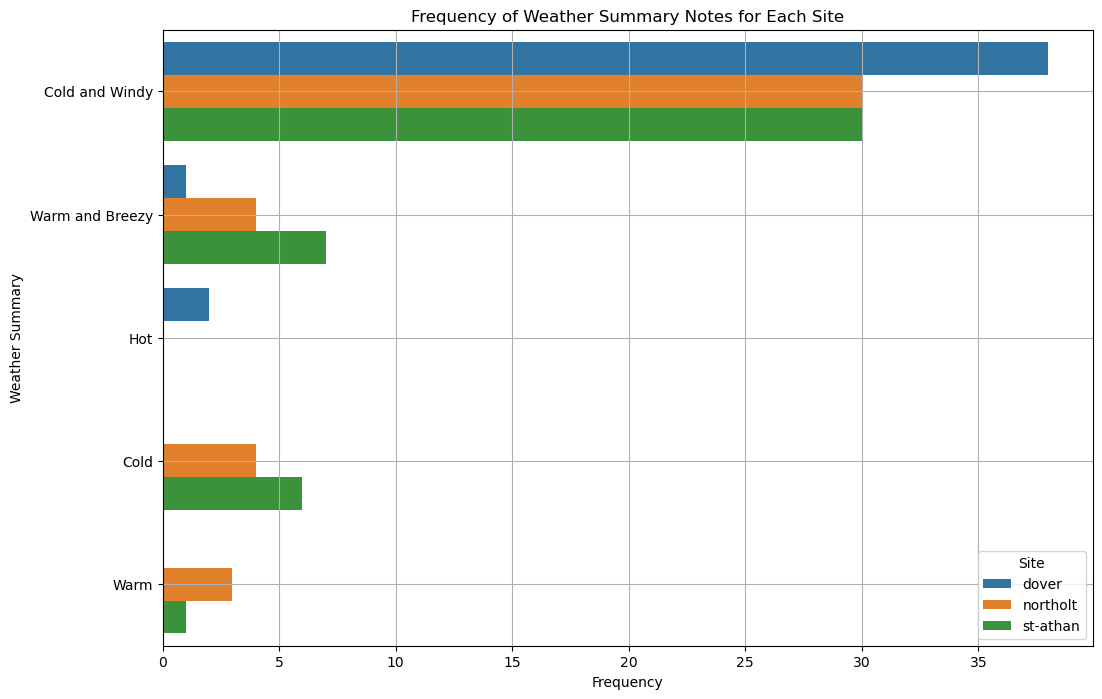

In [185]:
#Question 1:
##Plot the weather summary for each site
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_weather_summary_frequency(summaries):
    # Check if 'site' and 'weather_summary' columns exist in the DataFrame
    if 'site' not in summaries.columns:
        raise KeyError("The 'site' column is missing from the DataFrame.")
    if 'weather_summary' not in summaries.columns:
        raise KeyError("The 'weather_summary' column is missing from the DataFrame.")
    
    # Extract the site and weather summary data from the DataFrame
    site = summaries['site']
    weather_summary = summaries['weather_summary']
    
    # Create a DataFrame from the provided data
    data = pd.DataFrame({'Site': site, 'Weather Summary': weather_summary})
    
    # Plot the frequency of weather summary notes for each site
    plt.figure(figsize=(12, 8))
    sns.countplot(y='Weather Summary', hue='Site', data=data)
    plt.title('Frequency of Weather Summary Notes for Each Site')
    plt.xlabel('Frequency')
    plt.ylabel('Weather Summary')
    plt.legend(title='Site')
    plt.grid(True)
    plt.show()

# Example usage:
site_data = pd.read_csv('/home/zt24/numerical-programming-in-python/npp-pandas-assessment-esemsc-zt24/summary_data/weather_summaries.csv')
plot_weather_summary_frequency(site_data)

In [189]:
##Explanation:
# The Dover site has a lower latitude (around 51.1x) compared to the Northolt site (around 51.5x) and the St Athan site (around 51.4x)
# Therefore, I assume the Dover site is located further south, while the Northolt site is located further north.
# According to the plot above, the Dover site appears colder than the other sites.
# This is because the frequency of cold and windy weather is higher at the Dover site, even though there are two data points in the ‘hot’ category.
# Meanwhile, the Northolt and St Athan sites have a wider range of weather conditions, but most of them are in the cold and windy categories.
# Thus, according to the plot above, the southern area is not warmer than the northern area. This condition might be caused by various factors, such as the data for this case being inappropriate.

In [190]:
#Question 2
open_file = pd.read_csv('/home/zt24/numerical-programming-in-python/npp-pandas-assessment-esemsc-zt24/test_read_files/try_merged_df.csv')
data_types = open_file.dtypes
print(data_types)

dateTime                 object
site                     object
id                       object
longitude               float64
latitude                float64
airTemperature          float64
dewPoint                float64
meanSeaLevelPressure      int64
relativeHumidity        float64
windSpeed               float64
windDirection           float64
windGust                float64
visibility               object
dtype: object


In [191]:
# According to the data types above, we can see that the data type for the ‘dateTime’ column and the ‘visibility’ column is object.
# The ‘dateTime’ column must be formatted as an integer, while the ‘visibility’ column must be formatted as a float because it might have a decimal point.
# Thus, we must convert the format of the ‘dateTime’ and ‘visibility’ columns before further processing steps.
# Using the appropriate data types will affect precision and accuracy, making our work easier too.
# Imagine if the data is inappropriate and we didn’t check it before processing; it would return errors instead of correct results.
# Therefore, it is important to always check the data types to avoid any error messages.
# Data types can also affect memory usage. Converting data to the appropriate types can optimize memory usage.
# For example, using float32 for large datasets instead of float64 can save memory, though it might slightly reduce precision.
# Float32 reserves 8 bits for the exponent, while float64 reserves 11 bits, meaning float32 requires only half the memory of float64.
# It is important to consider using the appropriate data types for optimal results and efficiency.

Remember, the final 6 points are for:
- Deleting the file (answer.ipynb or answer.py) that you are not using.
- The state of your `reference.md` file (max 3 points)
- making at least 2 commits  to your repository (you can make more), no less than 4 hours apart (max 2 points)